# Homework - Network science and Graph Learning 
*OUALI Wissam*

In [26]:
# Make sure to run this cell first

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os
from abc import ABC
from abc import abstractmethod
import random
import pandas as pd
import random
import community


### Question 2: Social Network Analysis with the Facebook100 Dataset

In [27]:
# Load the graphs
caltech = nx.read_gml("data/Caltech36.gml")
mit = nx.read_gml("data/MIT8.gml")
johns_hopkins = nx.read_gml("data/Johns Hopkins55.gml")

In [28]:
# Compute the degree of each node for each graphs
caltech_degrees = [degree for (node,degree) in caltech.degree()]
mit_degrees = [degree for (node,degree) in mit.degree()]
johns_hopkins_degrees = [degree for (node,degree) in johns_hopkins.degree()]


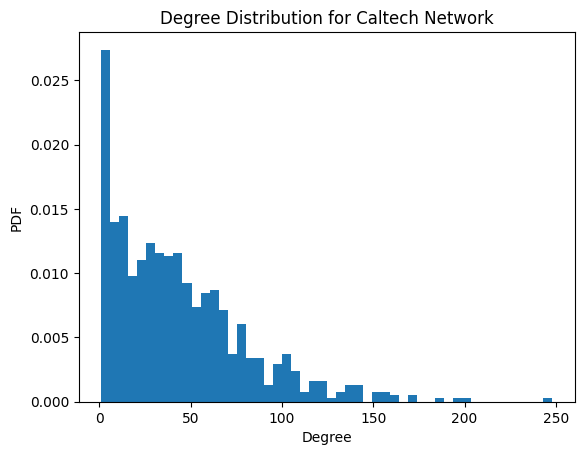

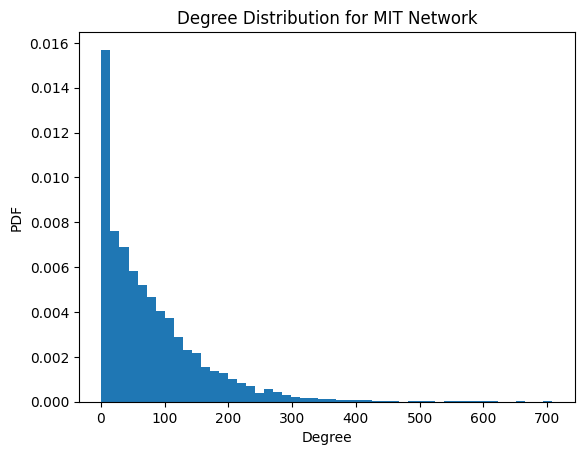

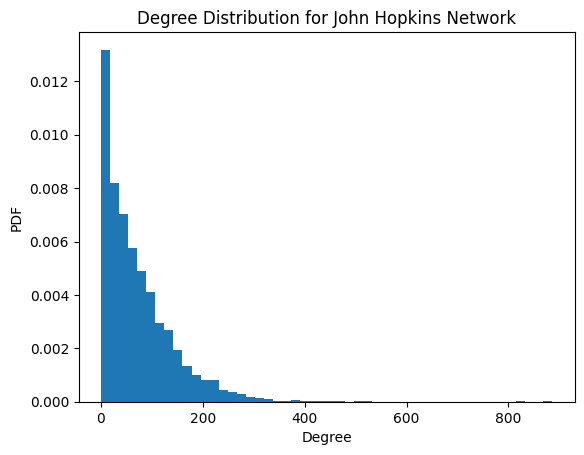

In [29]:
# Plot the histogram of the degree distribution for Caltech
plt.hist(caltech_degrees, bins=50, density=True)
plt.xlabel("Degree")
plt.ylabel("PDF")
plt.title("Degree Distribution for Caltech Network")
plt.show()

# Plot the histogram of the degree distribution for MIT
plt.hist(mit_degrees, bins=50, density=True)
plt.xlabel("Degree")
plt.ylabel("PDF")
plt.title("Degree Distribution for MIT Network")
plt.show()

# Plot the histogram of the degree distribution for Johns Hopkins
plt.hist(johns_hopkins_degrees, bins=50, density=True)
plt.xlabel("Degree")
plt.ylabel("PDF")
plt.title("Degree Distribution for John Hopkins Network")
plt.show()


Each of these degree distributions seems to follow a power-law. There are few nodes with high degrees and many nodes with low degrees which means that having much more friends than average is rare. It can be consistent with the fact that we are studying a Social Network. 

Since Caltech Network has less nodes than John Hopkins and MIT Networks, we can observe that its degree distribution is more skewed towards low degrees compared to the other two. 

Finally, we can conclude on that statement : these distributions indicate to us that the three graphs have few hubs.

In [30]:
# Compute the global clustering coefficient
caltech_global_cc = nx.average_clustering(caltech)
mit_global_cc = nx.average_clustering(mit)
johns_hopkins_global_cc = nx.average_clustering(johns_hopkins)

# Compute the mean local clustering coefficient
caltech_local_cc = nx.clustering(caltech)
mean_caltech_local_cc = np.average([value for value in caltech_local_cc.values()])

mit_local_cc = nx.clustering(mit)
mean_mit_local_cc = np.average([value for value in mit_local_cc.values()])

johns_hopkins_local_cc = nx.clustering(johns_hopkins)
mean_johns_hopkins_local_cc = np.average([value for value in johns_hopkins_local_cc.values()])

# Compute the edge density
caltech_edge_density = nx.density(caltech)
mit_edge_density = nx.density(mit)
johns_hopkins_edge_density = nx.density(johns_hopkins)

In [31]:
print("Caltech global CC: ", caltech_global_cc)
print("Caltech mean local CC: ", mean_caltech_local_cc)
print("Caltech edge density: ", caltech_edge_density)
print()

print("MIT global CC: ", mit_global_cc)
print("MIT mean local CC: ", mean_mit_local_cc)
print("MIT edge density: ", mit_edge_density)
print()

print("Johns Hopkins global CC: ", johns_hopkins_global_cc)
print("Johns Hopkins mean local CC: ", mean_johns_hopkins_local_cc)
print("Johns Hopkins edge density: ", johns_hopkins_edge_density)

Caltech global CC:  0.40929439048517247
Caltech mean local CC:  0.4092943904851723
Caltech edge density:  0.05640442132639792

MIT global CC:  0.2712187419501315
MIT mean local CC:  0.271218741950132
MIT edge density:  0.012118119495041378

Johns Hopkins global CC:  0.26839307371293525
Johns Hopkins mean local CC:  0.2683930737129351
Johns Hopkins edge density:  0.013910200162372396


The global clustering coefficient measures the degree to which nodes in a network tend to cluster together, while the mean local clustering coefficient measures the clustering around individual nodes. The edge density measures the proportion of possible edges that are present in the network.

Based on the density information, we can say that John Hopkins and MIT Networks are sparse (respectively 0.014 and 0.012 edge density) while Caltech Network is denser (with 0.056 edge density). The global clustering coefficient of the latter is also higher than the two others (0.41 vs 0.27 for the two), indicating that nodes in this network tend to cluster together more tightly.

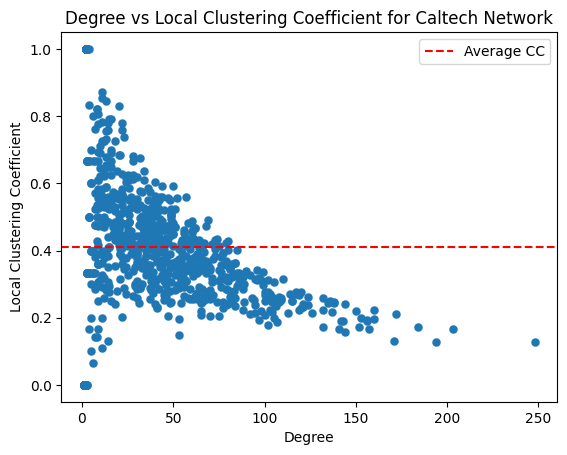

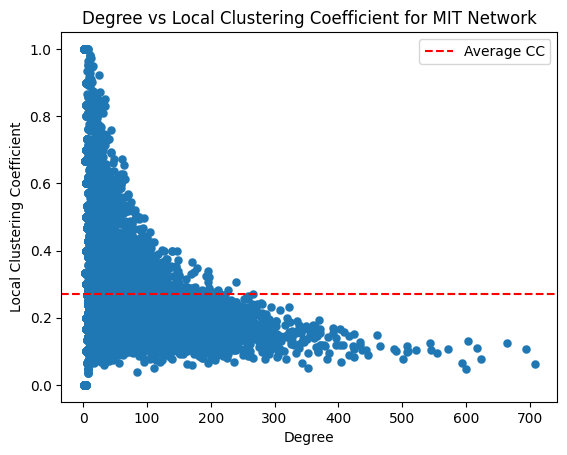

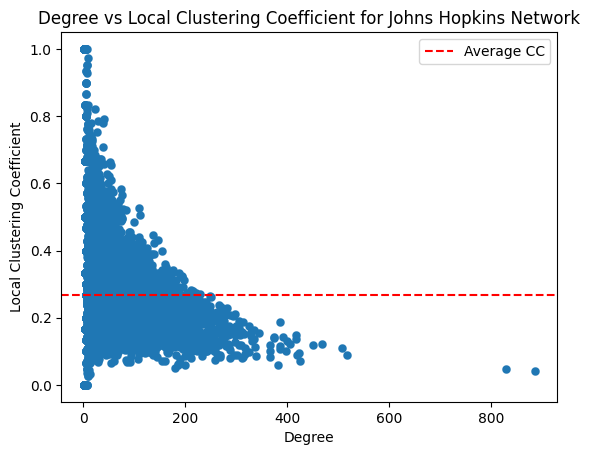

In [32]:
# Plot the scatter plot of degree versus local clustering coefficient for Caltech
plt.scatter(caltech_degrees, [value for value in caltech_local_cc.values()], linewidths=0.1)
plt.axhline(y=np.nanmean([value for value in caltech_local_cc.values()]), color="red", ls="--", label="Average CC")
plt.xlabel("Degree")
plt.ylabel("Local Clustering Coefficient")
plt.title("Degree vs Local Clustering Coefficient for Caltech Network")
plt.legend()
plt.show()

# Plot the scatter plot of degree versus local clustering coefficient for MIT
plt.scatter(mit_degrees, [value for value in mit_local_cc.values()], linewidths=0.1)
plt.axhline(y=np.nanmean([value for value in mit_local_cc.values()]), color="red", ls="--", label="Average CC")
plt.xlabel("Degree")
plt.ylabel("Local Clustering Coefficient")
plt.title("Degree vs Local Clustering Coefficient for MIT Network")
plt.legend()
plt.show()

# Plot the scatter plot of degree versus local clustering coefficient for Johns Hopkins
plt.scatter(johns_hopkins_degrees, [value for value in johns_hopkins_local_cc.values()], linewidths=0.1)
plt.axhline(y=np.nanmean([value for value in johns_hopkins_local_cc.values()]), color="red", ls="--", label="Average CC")
plt.xlabel("Degree")
plt.ylabel("Local Clustering Coefficient")
plt.title("Degree vs Local Clustering Coefficient for Johns Hopkins Network")
plt.legend()
plt.show()

These 3 graphs show the correlation between Degree and Local clustering coefficient for the Networks we are studying. We can observe that the less a node has connections with other nodes (low degree) the more its clustering coefficient can be high. In other words, high degree nodes tend to have lower clustering coefficients. This is consistent with the **small-world** phenomenon, which suggests that networks tend to have highly clustered regions while still allowing for relatively short paths between nodes.

In terms of differences, we can see that the Caltech network has a higher average clustering coefficient compared to the MIT and Johns Hopkins networks. As we already said, this suggests that the Caltech network may be more tightly connected than the other two networks. On the other hand, the MIT network has a wider range of degrees compared to the other two networks, with more nodes having higher degrees.

Overall, the degree distributions, clustering coefficients, and density information all suggest that the three networks exhibit properties of small-world networks. The differences observed between the networks may reflect underlying structural differences in the social relationships of the individuals represented in each network.

### Question 3: Assortativity Analysis with the Facebook100 Dataset

Assortativity is a measure of the tendency of nodes in a network to connect to other nodes with similar or dissimilar attributes.

In [33]:
directory = 'data'
count = 0
student_fac = {}
major_index = {}
degree = {}
dorm = {}
gender = {}

lengths = {}

# Compute assortativity coefficient for each attributes and the length of each graph
# Takes a long time (~1h)
for filename in os.scandir(directory):
    if filename.is_file():
        G = nx.read_gml(filename.path)
        student_fac[filename.name] = nx.attribute_assortativity_coefficient(G,"student_fac")
        major_index[filename.name] = nx.attribute_assortativity_coefficient(G, "major_index")
        degree[filename.name] = nx.degree_assortativity_coefficient(G)
        dorm[filename.name] = nx.attribute_assortativity_coefficient(G, "dorm")
        gender[filename.name] = nx.attribute_assortativity_coefficient(G, "gender")
            
        lengths[filename.name] = len(G)
        count += 1
        print("Graph number",count ,"loaded")

Graph number 1 loaded
Graph number 2 loaded
Graph number 3 loaded
Graph number 4 loaded
Graph number 5 loaded
Graph number 6 loaded
Graph number 7 loaded
Graph number 8 loaded
Graph number 9 loaded
Graph number 10 loaded
Graph number 11 loaded
Graph number 12 loaded
Graph number 13 loaded
Graph number 14 loaded
Graph number 15 loaded
Graph number 16 loaded
Graph number 17 loaded
Graph number 18 loaded
Graph number 19 loaded
Graph number 20 loaded
Graph number 21 loaded
Graph number 22 loaded
Graph number 23 loaded
Graph number 24 loaded
Graph number 25 loaded
Graph number 26 loaded
Graph number 27 loaded
Graph number 28 loaded
Graph number 29 loaded
Graph number 30 loaded
Graph number 31 loaded
Graph number 32 loaded
Graph number 33 loaded
Graph number 34 loaded
Graph number 35 loaded
Graph number 36 loaded
Graph number 37 loaded
Graph number 38 loaded
Graph number 39 loaded
Graph number 40 loaded
Graph number 41 loaded
Graph number 42 loaded
Graph number 43 loaded
Graph number 44 load

#### Assortativity - Student status attribute

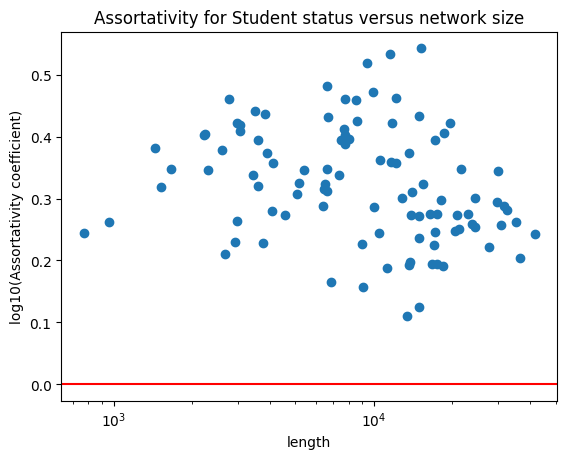

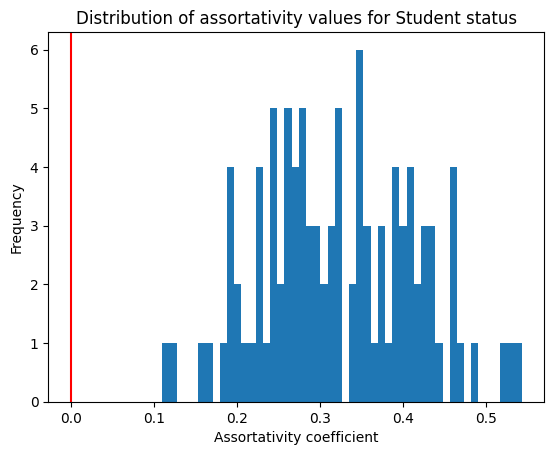

In [34]:
plt.scatter([value for value in lengths.values()], [value for value in student_fac.values()])
plt.xscale("log")
plt.xlabel('length')
plt.ylabel('log10(Assortativity coefficient)')
plt.title('Assortativity for Student status versus network size')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

plt.hist([value for value in student_fac.values()], bins=50)
plt.xlabel('Assortativity coefficient')
plt.ylabel('Frequency')
plt.title('Distribution of assortativity values for Student status')
plt.axvline(x=0, color='r', linestyle='-')
plt.show()

In [35]:
top_student_status = sorted([value for value in student_fac.values()], reverse=True)[:5]
top_keys = []

for i in range(len(top_student_status)):
    for k,v in student_fac.items():
        if v == top_student_status[i]:
          top_keys.append(k)

print("List of the top assortativity coefficient for Student status attribute : ",top_student_status)
print("List of the top Networks related to the list above :",top_keys)
print()

bot_student_status = sorted([value for value in student_fac.values()])[:5]
bot_keys = []

for i in range(len(bot_student_status)):
    for k,v in student_fac.items():
        if v == bot_student_status[i]:
          bot_keys.append(k)

print("List of the bot assortativity coefficient for Student status attribute : ",bot_student_status)
print("List of the bot Networks related to the list above :",bot_keys)



List of the top assortativity coefficient for Student status attribute :  [0.5426250622894172, 0.5331807976868101, 0.5187940365222197, 0.4822395993165163, 0.472066970924315]
List of the top Networks related to the list above : ['Harvard1.gml', 'BC17.gml', 'Georgetown15.gml', 'Princeton12.gml', 'Duke14.gml']

List of the bot assortativity coefficient for Student status attribute :  [0.11020028330029111, 0.12512677875910055, 0.1573732340930138, 0.16479416353625825, 0.18783822430293196]
List of the bot Networks related to the list above : ['USF51.gml', 'UCF52.gml', 'Maine59.gml', 'UC64.gml', 'Cal65.gml']


*Reminder : Student status attribute --> undergraduate, graduate student, summer student, faculty, staff, or alumni.*

We can observe that every Network shows a positive assortativity, and most of them are significant. In this sense, people are more likely to make friends with others of similar status, which is understandable and plausible. 

By printing the networks with the highests and lowests values of assortativity, we can possibly speculate a little bit more on the process of the formation of friendships. In this case, maybe the students in the schools with higher reputation than average (like Princeton and Harvard) take more into account the student status because they have been in a more competitive environment and are therefore more likely to recognize and relate to others with at least the same student status. Indeed this last statement is only speculation.

#### Assortativity - Major attribute

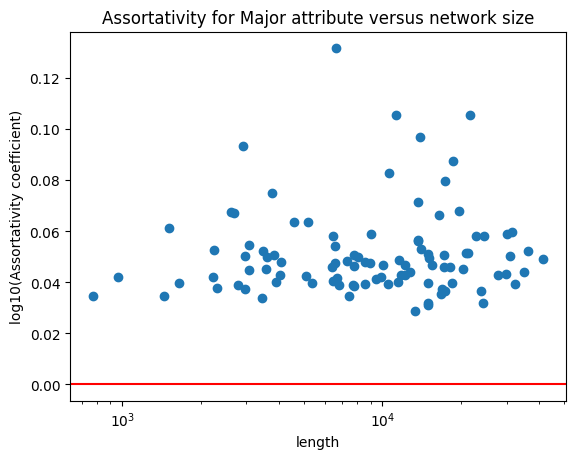

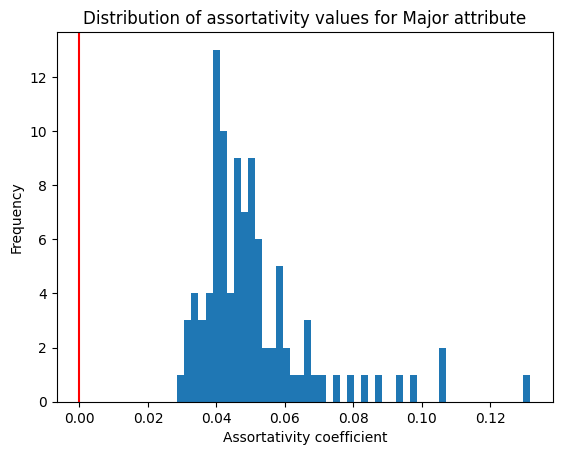

In [36]:
plt.scatter([value for value in lengths.values()], [value for value in major_index.values()])
plt.xscale("log")
plt.xlabel('length')
plt.ylabel('log10(Assortativity coefficient)')
plt.title('Assortativity for Major attribute versus network size')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

plt.hist([value for value in major_index.values()], bins=50)
plt.xlabel('Assortativity coefficient')
plt.ylabel('Frequency')
plt.title('Distribution of assortativity values for Major attribute')
plt.axvline(x=0, color='r', linestyle='-')
plt.show()

In [37]:
top_major = sorted([value for value in major_index.values()], reverse=True)[:5]
top_keys_major = []

for i in range(len(top_major)):
    for k,v in major_index.items():
        if v == top_major[i]:
          top_keys_major.append(k)

print("List of the top assortativity coefficient for Major attribute : ",top_major)
print("List of the top Networks related to the list above :",top_keys_major)

List of the top assortativity coefficient for Major attribute :  [0.13165372912708742, 0.1056644354231659, 0.10540018670257108, 0.09708983846144985, 0.09350709613377944]
List of the top Networks related to the list above : ['Carnegie49.gml', 'NYU9.gml', 'Cal65.gml', 'Northeastern19.gml', 'Oberlin44.gml']


*Reminder : Major --> main focus of a degree's student*

At first sight, it seems that we observe more or less the same thing as for the attribute "Student status". However, if we look at the values of the coefficients, we can see that even if they are all positive, they are mostly very close to zero, the maximum being equal to 0.13.

In this sense, we can conclude that there is no strong tendency for this attribute. At best, this tendency is very slightly positive. In other words, people can be interested in making friends with people of the same major but in a very slight way.

#### Assortativity - Degree

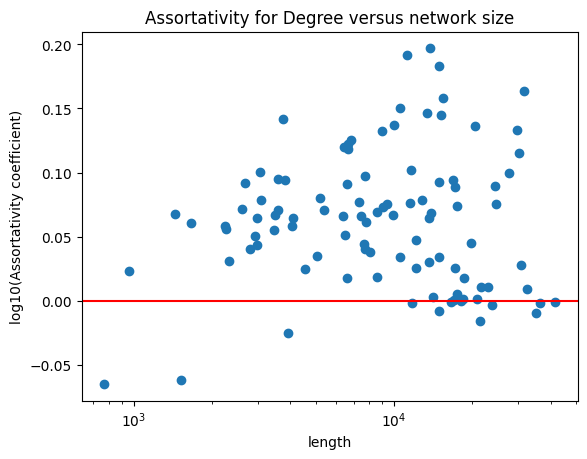

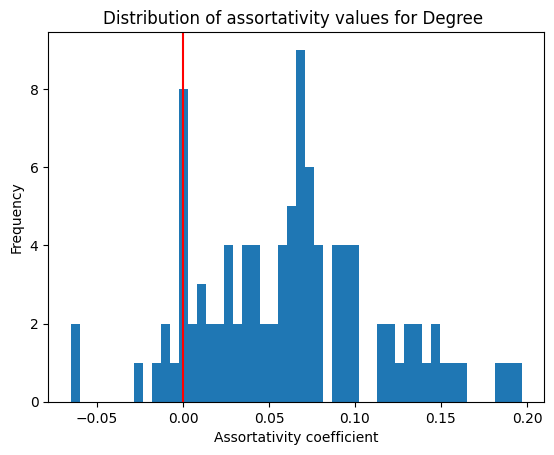

In [38]:
plt.scatter([value for value in lengths.values()], [value for value in degree.values()])
plt.xscale("log")
plt.xlabel('length')
plt.ylabel('log10(Assortativity coefficient)')
plt.title('Assortativity for Degree versus network size')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

plt.hist([value for value in degree.values()], bins=50)
plt.xlabel('Assortativity coefficient')
plt.ylabel('Frequency')
plt.title('Distribution of assortativity values for Degree ')
plt.axvline(x=0, color='r', linestyle='-')
plt.show()

In [39]:
top_degree = sorted([value for value in degree.values()], reverse=True)[:5]
top_keys_degree = []

for i in range(len(top_degree)):
    for k,v in degree.items():
        if v == top_degree[i]:
          top_keys_degree.append(k)

print("List of the top assortativity coefficient for Degree : ",top_degree)
print("List of the top Networks related to the list above :",top_keys_degree)
print()

bot_degree = sorted([value for value in degree.values()])[:5]
bot_keys_degree = []

for i in range(len(bot_degree)):
    for k,v in degree.items():
        if v == bot_degree[i]:
          bot_keys_degree.append(k)

print("List of the bot assortativity coefficient for Degree : ",bot_degree)
print("List of the bot Networks related to the list above :",bot_keys_degree)


List of the top assortativity coefficient for Degree :  [0.19689194617654843, 0.19161218892182671, 0.1830925571215007, 0.16389241281404152, 0.158460188647669]
List of the top Networks related to the list above : ['UC61.gml', 'Cal65.gml', 'UCSB37.gml', 'Texas80.gml', 'MU78.gml']

List of the bot assortativity coefficient for Degree :  [-0.0652729511948234, -0.061966981008910633, -0.025515330213873397, -0.0160740257703725, -0.009647878005893272]
List of the bot Networks related to the list above : ['Caltech36.gml', 'Simmons81.gml', 'Brandeis99.gml', 'Virginia63.gml', 'UF21.gml']


*Reminder : Degree --> Number of connections with other nodes*

This scatter plot is more sparse than the first two. There are mainly positive values but also few negative values. Hence, the Degree is slightly assortative in these social networks. People with the same social behavior may have a tendency to bound themselves. For example, shy people may link with few people that are probably shy as well, and the same goes for extroverts. Indeed this is not always the case, but the tendency is strong enough to be noted

However, I have no interpretation regarding the Networks with the top and bot values. 

#### Assortativity - Dorm attribute

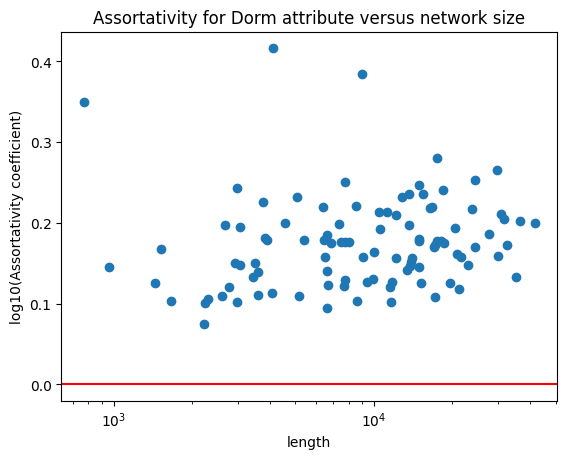

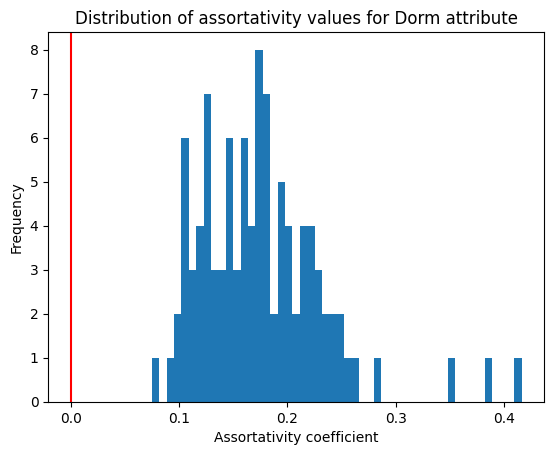

In [40]:
plt.scatter([value for value in lengths.values()], [value for value in dorm.values()])
plt.xscale("log")
plt.xlabel('length')
plt.ylabel('log10(Assortativity coefficient)')
plt.title('Assortativity for Dorm attribute versus network size')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

plt.hist([value for value in dorm.values()], bins=50)
plt.xlabel('Assortativity coefficient')
plt.ylabel('Frequency')
plt.title('Distribution of assortativity values for Dorm attribute')
plt.axvline(x=0, color='r', linestyle='-')
plt.show()

In [41]:
top_dorm = sorted([value for value in dorm.values()], reverse=True)[:5]
top_keys_dorm = []

for i in range(len(top_dorm)):
    for k,v in dorm.items():
        if v == top_dorm[i]:
          top_keys_dorm.append(k)

print("List of the top assortativity coefficient for Dorm attribute : ",top_dorm)
print("List of the top Networks related to the list above :",top_keys_dorm)

List of the top assortativity coefficient for Dorm attribute :  [0.4160174984372533, 0.38456528487616004, 0.3491531008726444, 0.28033524372883173, 0.2649724290428108]
List of the top Networks related to the list above : ['Rice31.gml', 'UCSC68.gml', 'Caltech36.gml', 'Oklahoma97.gml', 'Indiana69.gml']


The Dorm attribute is clearly assortative. This is consistent and understandable, people are indeed more likely to befriend each other if they rest in the same dorm. So this friendship is transposed from reality to the social network. However, sleeping in different dorms does not prevent the students from linking with each other.

It would be interesting to see if the networks with highest values of assortativity for the Dorm attribute are the same as the networks with highest values for the gender attribute (maybe in case of mixed dorms). Let's observe that below. 

#### Assortativity - Gender attribute

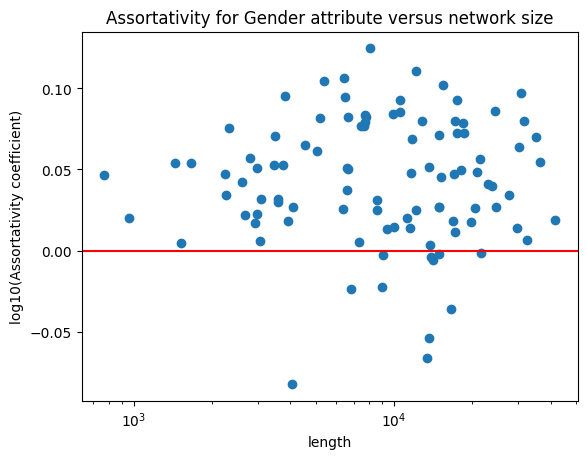

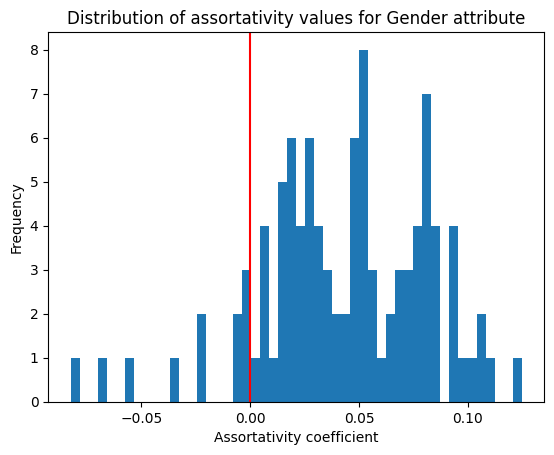

In [42]:
plt.scatter([value for value in lengths.values()], [value for value in gender.values()])
plt.xscale("log")
plt.xlabel('length')
plt.ylabel('log10(Assortativity coefficient)')
plt.title('Assortativity for Gender attribute versus network size')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

plt.hist([value for value in gender.values()], bins=50)
plt.xlabel('Assortativity coefficient')
plt.ylabel('Frequency')
plt.title('Distribution of assortativity values for Gender attribute')
plt.axvline(x=0, color='r', linestyle='-')
plt.show()


In [43]:
top_gender = sorted([value for value in gender.values()], reverse=True)[:5]
top_keys_gender = []

for i in range(len(top_gender)):
    for k,v in gender.items():
        if v == top_gender[i]:
          top_keys_gender.append(k)

print("List of the top assortativity coefficient for Gender attribute : ",top_gender)
print("List of the top Networks related to the list above :",top_keys_gender)

List of the top assortativity coefficient for Gender attribute :  [0.12472343527912087, 0.11054561418140783, 0.10637579721842909, 0.10481614598220136, 0.10228364673472046]
List of the top Networks related to the list above : ['Vanderbilt48.gml', 'Notre Dame57.gml', 'MIT8.gml', 'Wake73.gml', 'MU78.gml']


*cf project statement :*

" The distribution of points spans
the line of no assortativity, with some values nearly as far below 0 as others are
above 0. However, the gender attributes do appear to be slightly assortative in
these social networks: although all values are within 6% in either direction of 0,
the mean assortativity is 0.02, which is slightly above 0. This suggests a slight
amount of homophily by gender (like links with like) in the way people friend
each other on Facebook, although the tendency is very weak. In some schools,
we see a slight tendency for heterophily (like links with dislike), as one might
expect if the networks reflected heteronormative dating relationships.
"

Unfortunately, there is no apparent link between the Network with highest values for Dorm attribute and the others with highest values for Gender attribute. 

#### Conclusion

To conclude on the assortativity of each vertex's attributes, we can say that every attribute is **at least** slightly assortative and some of them are more (in a descending order : Student status, Dorm, Degree, Major, Gender).

In most of the cases, we can make the following statement : two linked vertices are more likely to have similarities in their attributes.

### Question 4: Link prediction

#### Prediction metrics implementation

In [44]:
class LinkPrediction(ABC):
    def __init__(self, graph):
        """
        Constructor

        Parameters
        ----------
        graph : Networkx graph
        """
        self.graph = graph
        self.N = len(graph)

    def neighbors(self, v):
        """
        Return the neighbors list of a node

        Parameters
        ----------
            v: int
                node id

        Return
        ------
            neighbors_list : python list
        """
        neighbors_list = self.graph.neighbors(v)
        return list(neighbors_list)

    @abstractmethod
    def fit(self):
        raise NotImplementedError("Fit must be implemented")

class CommonNeighbors(LinkPrediction):
    def __init__(self, graph):
        super(CommonNeighbors, self).__init__(graph)

    def fit(self):
        cn_scores = {}
        for u in self.graph.nodes():
            for v in self.graph.nodes():
                if u < v:
                    cn_score = len(set(self.neighbors(u)).intersection(set(self.neighbors(v))))
                    cn_scores[(u, v)] = cn_score
        return cn_scores

class Jaccard(LinkPrediction):
    def __init__(self, graph):
        super(Jaccard, self).__init__(graph)

    def fit(self):
        jc_scores = {}
        for u in self.graph.nodes():
            for v in self.graph.nodes():
                if u < v:
                    num = len(set(self.neighbors(u)).intersection(set(self.neighbors(v))))
                    den = len(set(self.neighbors(u)).union(set(self.neighbors(v))))
                    jc_score = num / den if den != 0 else 0
                    jc_scores[(u, v)] = jc_score
        return jc_scores

class AdamicAdar(LinkPrediction):
    def __init__(self, graph):
        super(AdamicAdar, self).__init__(graph)

    def fit(self):
        aa_scores = {}
        for u in self.graph.nodes():
            for v in self.graph.nodes():
                if u < v:
                    aa_score = 0
                    for w in set(self.neighbors(u)).intersection(set(self.neighbors(v))):
                        aa_score += 1 / np.log(len(self.neighbors(w)))
                    aa_scores[(u, v)] = aa_score
        return aa_scores


#### Tests

We just want to ensure that our implementation computes good values by comparing them with NetworkX methods.

In [45]:
G = nx.read_gml("data/Caltech36.gml")

In [46]:
# Testing CommonNeighbors implementation

# Create an instance of the CommonNeighbors class
cn = CommonNeighbors(G)

# Calculate the Common Neighbors score for each pair of nodes in the graph
cn_scores = cn.fit()    

# Print the Common Neighbors score for the first 10 pairs of nodes
for i, (u, v) in enumerate(cn_scores.keys()):
    if i >= 3:
        break
    print(f"Common Neighbors score for ({u}, {v}): {cn_scores[(u, v)]}")
    print(f"NetworkX value for ({u}, {v}): {[node for node in nx.common_neighbors(G, u, v)]} ")
    print()

Common Neighbors score for (0, 1): 11
NetworkX value for (0, 1): ['89', '113', '150', '187', '251', '376', '483', '625', '637', '693', '734'] 

Common Neighbors score for (0, 2): 3
NetworkX value for (0, 2): ['222', '372', '519'] 

Common Neighbors score for (0, 3): 2
NetworkX value for (0, 3): ['364', '708'] 



In [47]:
# Testing Jaccard implementation

# Create an instance of the Jaccard class
jaccard = Jaccard(G)

# Calculate the Jaccard coefficient score for each pair of nodes in the graph
jaccard_scores = jaccard.fit()
i = 0
j = 0

# With NetworkX
bunch = [('0', '1'), ('0', '2'), ('0', '3'), ('0', '4')]
nx_scores = nx.jaccard_coefficient(G, bunch)

# Print the Jaccard coefficient score for each pair of nodes in the graph
for edge, score in jaccard_scores.items():
    print(edge, score)
    i += 1
    if i > 3:
        break

for u,v,p in nx_scores:
    print(f"Jaccard coef for ({u}, {v}) -> {p:.8f}")

('0', '1') 0.0658682634730539
('0', '2') 0.0234375
('0', '3') 0.014598540145985401
('0', '4') 0.3141025641025641
Jaccard coef for (0, 1) -> 0.06586826
Jaccard coef for (0, 2) -> 0.02343750
Jaccard coef for (0, 3) -> 0.01459854
Jaccard coef for (0, 4) -> 0.31410256


In [48]:
# Testing Adamic/Adar implementation

# Create an instance of the AdamicAdar class and calculate scores
aa = AdamicAdar(G)
aa_scores = aa.fit()

#With NetworkX
bunch = [('0', '4'), ('0', '30'), ('0', '35')]
nx_aa  = nx.adamic_adar_index(G, bunch)

# Print the scores for the first few edges
for edge in list(G.edges())[:3]:
    print(f"Edge {edge} has  AA score {aa_scores[edge]}")

for u,v,p in nx_aa:
    print(f"AA nx value for ({u}, {v}) -> {p:.8f}")

Edge ('0', '4') has  AA score 11.101332817435523
Edge ('0', '30') has  AA score 6.343039915144787
Edge ('0', '35') has  AA score 7.5070753148308365
AA nx value for (0, 4) -> 11.10133282
AA nx value for (0, 30) -> 6.34303992
AA nx value for (0, 35) -> 7.50707531


#### Link predictor evaluation

In [49]:
fractions = [0.05, 0.1, 0.15, 0.2]
k_values = [50, 100, 200, 400]

def predictor_evaluation(predictor, fraction):
    
    # Select a graph
    graph = predictor.graph
    
    # Remove a fraction of edges
    n_edges = int(fraction * graph.number_of_edges())
    edges = list(graph.edges())
    random.shuffle(edges)
    e_removed = edges[:n_edges]
    #graph.remove_edges_from(e_removed)

    # Compute the predictor scores, sort the values and take the k first values
    predict = predictor.fit()
    predict_edges_sorted = sorted(predict.items(), key=lambda x: x[1], reverse=True)

    precision = {}
    recall = {}
    topk_predictive_rate = {}
    
    for k in k_values:
        topk_predict_edges = set([e[0] for e in predict_edges_sorted[:k]])
        intersection_size = len(topk_predict_edges.intersection(e_removed))

        TP = intersection_size
        FP = len(topk_predict_edges) - intersection_size
        FN = len(e_removed) - intersection_size

        precision[k] = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall[k] = TP / (TP + FN) if (TP + FN) > 0 else 0
        topk_predictive_rate[k] = TP / k
    
    return precision, recall, topk_predictive_rate

    

In [50]:
G = nx.read_gml("data/Caltech36.gml")
predictors = [CommonNeighbors(G), Jaccard(G), AdamicAdar(G)]
predictions = []
f = random.choice(fractions)
for p in predictors:
    predictions.append(predictor_evaluation(p, f))  # List of 3x3 dicts
                                                    # predictions[0] -> 3 dicts from CommonNeighbors evaluation

In [51]:
print(predictions[0])
print(predictions[2])

({50: 0.18, 100: 0.13, 200: 0.14, 400: 0.15}, {50: 0.002701891323926749, 100: 0.003902731912338637, 200: 0.008405884118883218, 400: 0.018012608826178327}, {50: 0.18, 100: 0.13, 200: 0.14, 400: 0.15})
({50: 0.14, 100: 0.15, 200: 0.13, 400: 0.1525}, {50: 0.0021014710297208045, 100: 0.004503152206544582, 200: 0.007805463824677274, 400: 0.018312818973281297}, {50: 0.14, 100: 0.15, 200: 0.13, 400: 0.1525})


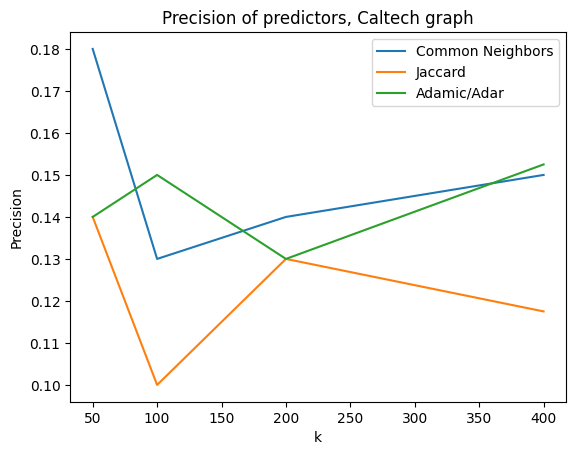

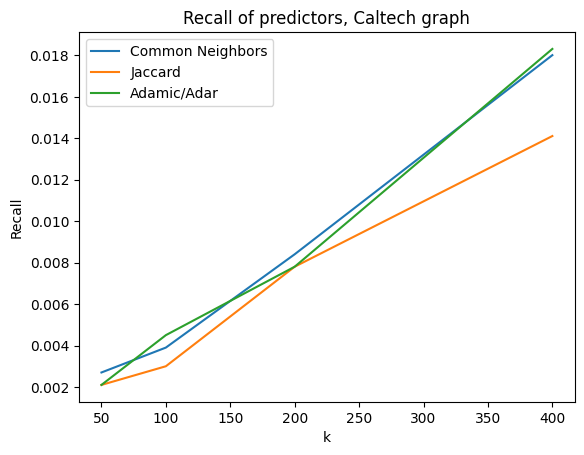

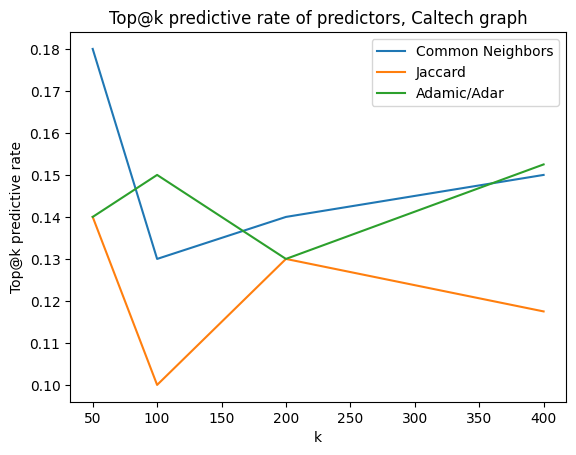

In [52]:
cn_precision, cn_recall, cn_topk_predictive_rate = predictions[0]
jc_precision, jc_recall, jc_topk_predictive_rate = predictions[1]
aa_precision, aa_recall, aa_topk_predictive_rate = predictions[2]


plt.plot([key for key in cn_precision.keys()], [value for value in cn_precision.values()], label="Common Neighbors")
plt.plot([key for key in jc_precision.keys()], [value for value in jc_precision.values()], label="Jaccard")
plt.plot([key for key in aa_precision.keys()], [value for value in aa_precision.values()], label="Adamic/Adar")
plt.xlabel("k")
plt.ylabel("Precision")
plt.title("Precision of predictors, Caltech graph")
plt.legend()
plt.show()

plt.plot([key for key in cn_recall.keys()], [value for value in cn_recall.values()], label="Common Neighbors")
plt.plot([key for key in jc_recall.keys()], [value for value in jc_recall.values()], label="Jaccard")
plt.plot([key for key in aa_recall.keys()], [value for value in aa_recall.values()], label="Adamic/Adar")
plt.xlabel("k")
plt.ylabel("Recall")
plt.title("Recall of predictors, Caltech graph")
plt.legend()
plt.show()

plt.plot([key for key in cn_topk_predictive_rate.keys()], [value for value in cn_topk_predictive_rate.values()], label="Common Neighbors")
plt.plot([key for key in jc_topk_predictive_rate.keys()], [value for value in jc_topk_predictive_rate.values()], label="Jaccard")
plt.plot([key for key in aa_topk_predictive_rate.keys()], [value for value in aa_topk_predictive_rate.values()], label="Adamic/Adar")
plt.xlabel("k")
plt.ylabel("Top@k predictive rate")
plt.title("Top@k predictive rate of predictors, Caltech graph")
plt.legend()
plt.show()

In [ ]:
# In case we want to load n_limit graphes to compute the predictions for each, which is not possible since the code would make my PC crash
directory = "data"
graphes = []
count = 0 
n_limit = 3
for file in os.scandir(directory):
    G = nx.read_gml(file.path)
    graphes.append(G)
    count += 1
    if count > n_limit: 
        break

#### Conclusion

**WARNING :** Normally it would be necessary to compute the predictions on a large number of graphs. Unfortunately, I couldn't due to my own device performance. Even if I tried to load on a single graph, because of its size, the computing time was too long and my PC would crash and reboot no matter what. It may be due to a wrong implementation of the predictors, but I didn't find the issue. I found out that I finally could compute with one of the smallest graphs (Caltech). In this sense, the following interpretation will be incomplete. 

It is hard to have a relevant analysis since we couldn't compute our predictions on a large scale of graphs. 
NB : We should have Adamic/Adar and Jaccar predictions outperforming Common Neighbors prediction.

### Question 5: Find missing labels with the label propagation algorithms

In [54]:
def fisher_yates(arr):
    from random import randint

    for i in range(len(arr)):
        j = randint(0, len(arr)-1)
        arr[j],arr[i] = arr[i],arr[j]
        
    return arr
def lpa(G, label):
    # Initialize the label of each node to its own ID
    labels = {node: G.nodes[node][label] for node in G.nodes()}
    
    # print(f"les labels : {labels}")
    # print()
    
    # Keep iterating until convergence
    while True:
        # Shuffle the order of nodes to update
        nodes = list(G.nodes())
        fisher_yates(nodes)
        
        # Keep track of the number of nodes that changed labels in this iteration
        num_changes = 0
        
        # Update the label of each node based on its neighbors' labels
        for node in nodes:
            # Count the frequency of each neighbor's label
            neighbor_labels = {}
            for neighbor in G.neighbors(node):
                neighbor_label = labels[neighbor]
                neighbor_labels[neighbor_label] = neighbor_labels.get(neighbor_label, 0) + 1
           
            # print(f"Les labels des voisins de {node} : {neighbor_labels}")
            # print(f"Le noeud en question : {node} {G.nodes[node]} ")
           
            # Choose the most frequent neighbor label as the new label for this node
            new_label = max(neighbor_labels, key=neighbor_labels.get)
           
            # print(f"nouveau label : {new_label}")
            
            # If the new label is different from the current label, update the label and count the change
            if labels[node] != new_label:
                labels[node] = new_label
                num_changes += 1

        # Stop if no labels changed in this iteration
        if num_changes == 0:
            break
    
    return labels

def acc(G1, G2, modified_nodes, label):
    correct = 0
    for node in modified_nodes:
        if int(G1.nodes[node][label]) == int(G2.nodes[node][label]):
            correct += 1
    accuracy = correct / len(modified_nodes)
    return accuracy, correct
    


In [55]:
# Load the directory, a random sample of 10 files, the label and fraction list. Initialize the results lists/dict.
directory = "data"
files_list = random.sample(list(os.scandir(directory)), 10)
label_list = ['dorm', 'major_index', 'gender']
fractions = [0.1, 0.2, 0.3]
dorm_accuracies, major_accuracies, gender_accuracies = [], [], []
final_results = {}

print(f"List on graphs on which we will operate LPA : {files_list}")
for f in fractions:
    for filename in files_list:
        if filename.is_file():
            G = nx.read_gml(filename.path)
            G_ref = G.copy()
            print(f"{filename.name} graph loaded")
            
            for label in label_list:                
                #print(f"label, f : {label}, {f}")

                existing_labels = set(G.nodes[node][label] for node in G.nodes() if G.nodes[node].get(label) is not None)
                new_label = max(existing_labels) + 1 if existing_labels else 0

                # Compute the number of nodes to remove the attribute value for (10% of total nodes)
                num_nodes_to_modify = int(f * len(G.nodes()))
                    
                #print(f"Number of nodes to modify : {num_nodes_to_modify}")

                # Select the nodes to modify randomly
                nodes_to_modify = random.sample(G.nodes(), num_nodes_to_modify)

                # Remove the 'dorm' attribute value for each selected node
                i = 0
                for node in nodes_to_modify:
                    i += 1
                    G.nodes[node][label] = new_label + i
                    
                #print(f"{label} attribute removed")

                # Run label propagation algorithm and assign the labels to the modified nodes
                modified_nodes = [node for node in G.nodes() if node in nodes_to_modify]
                labels = lpa(G, label)
                for node in modified_nodes:
                    if node in labels:
                        G.nodes[node][label] = labels[node]
                    if int(node) in labels:
                        G.nodes[node][label] = labels[int(node)]

                # Evaluate accuracy (depending on current graph)
                accuracy, correct = acc(G, G_ref, modified_nodes, label)
                if label == 'dorm':
                    dorm_accuracies.append(accuracy)
                if label == 'gender':
                    gender_accuracies.append(accuracy)
                if label == 'major_index':
                    major_accuracies.append(accuracy)
    
    # Compute the average accuracy      
    dorm_mean, gender_mean, major_mean = np.mean(dorm_accuracies), np.mean(gender_accuracies), np.mean(major_accuracies)
    final_results[f] = [dorm_mean, major_mean, gender_mean]
    
print(f"Final results : {final_results}")


List on graphs on which we will operate LPA : [<DirEntry 'Stanford3.gml'>, <DirEntry 'William77.gml'>, <DirEntry 'BU10.gml'>, <DirEntry 'USFCA72.gml'>, <DirEntry 'MIT8.gml'>, <DirEntry 'Auburn71.gml'>, <DirEntry 'USF51.gml'>, <DirEntry 'UConn91.gml'>, <DirEntry 'Simmons81.gml'>, <DirEntry 'Bowdoin47.gml'>]
Stanford3.gml graph loaded
William77.gml graph loaded
BU10.gml graph loaded
USFCA72.gml graph loaded
MIT8.gml graph loaded
Auburn71.gml graph loaded
USF51.gml graph loaded
UConn91.gml graph loaded
Simmons81.gml graph loaded
Bowdoin47.gml graph loaded
Stanford3.gml graph loaded
William77.gml graph loaded
BU10.gml graph loaded
USFCA72.gml graph loaded
MIT8.gml graph loaded
Auburn71.gml graph loaded
USF51.gml graph loaded
UConn91.gml graph loaded
Simmons81.gml graph loaded
Bowdoin47.gml graph loaded
Stanford3.gml graph loaded
William77.gml graph loaded
BU10.gml graph loaded
USFCA72.gml graph loaded
MIT8.gml graph loaded
Auburn71.gml graph loaded
USF51.gml graph loaded
UConn91.gml graph 

In [56]:
df = pd.DataFrame(final_results)
df.index = ['Dorm', 'Major','Gender']
print("Accuracy for given Fraction and Attribute Table")
df

Accuracy for given Fraction and Attribute Table


,0.1,0.2,0.3
Dorm,0.433794,0.426360,0.422619
Major,0.173867,0.170927,0.170242
Gender,0.563260,0.564660,0.565598


It appears that the accuracy of the label propagation algorithm is higher for the "dorm" and the "gender" attributes compared to the "major" attribute, across all fractions. This means that the algorithm is better at recovering missing values for "dorm" and "gender" attributes than for the "major" attribute. It is noticeable that these results fit with the table given in the project statement for Duke university. 

The reason for this difference in accuracy between attributes could be due to a variety of factors, such as the density of connections between nodes for each attribute.

More specifically, knowing our assortativity results, the gap between "dorm" and "major" accuracy may be explained by the fact that the assortativity of the "dorm" attribute is much more significant than the "major" attribute. Hence, the "dorm" label is more likely to be spread by the LPA over the node connections. 

If we deal with the case of the "gender" attribute which has the highest LPA accuracy, we can't really explain that assortativity as its coefficient is not that important. In this sense, this high value may be due to the number of possible "gender" values : 2 in this case. So we approach a value of 1/2 accuracy, as a purely random algorithm should also achieve. Nevertheless, we can notice that the "gender" accuracy value is below 0.5. This is consistent with its non significant assortativity value. In other words, if that attribute would be more assortative, the LPA accuracy should be higher than 0.5 since the label spread would be easier. 

### Question 6: Communities detection with the FB100 datasets

In [57]:
G_fb = nx.read_gml("data/American75.gml")

# Detect communities using the Louvain algorithm
partition = community.best_partition(G_fb)

# Print the number of communities detected
print("Number of communities detected:", len(set(partition.values())))

Number of communities detected: 21


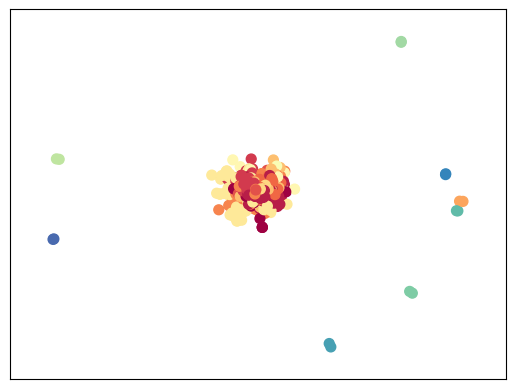

In [58]:
pos = nx.spring_layout(G_fb)
size = float(len(set(partition.values())))
colors = [plt.cm.Spectral(float(i)/size) for i in partition.values()]
nx.draw_networkx_nodes(G_fb, pos, node_color=colors, node_size=50)
nx.draw_networkx_edges(G_fb, pos, alpha=0.5)
plt.show()